In [1]:
import os
import obspy
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
%run helperfunctions.ipynb
os.getcwd()

'/Users/albertkong/grillochallenge'

In [2]:
os.chdir('lse_challenge/data')

In [3]:
# np.random.seed(1)
# Signal List
os.chdir('signal')
signals = []
signal_files = os.listdir()
for sigfile in signal_files:
    tmp_trace = obspy.read(sigfile)
    cutlength = np.random.randint(900)
    trace_mat = [tmp_trace[0].data[cutlength:1000+cutlength], tmp_trace[1].data[cutlength:1000+cutlength], tmp_trace[2].data[cutlength:1000+cutlength]]
    signals.append([trace_mat, cutlength, 1])
    
    # Negative Transformations
    neg_mat = rot_xyz(trace_mat, 0, -np.pi, 0)
    signals.append([neg_mat, cutlength, 1])
    
    # X, Y, and Z Rotations by Theta
    theta = np.random.uniform()*2*np.pi
    x_mat = rot_x(trace_mat, theta)
    signals.append([x_mat, cutlength, 1])
    y_mat = rot_y(trace_mat, theta)
    signals.append([y_mat, cutlength, 1])
    z_mat = rot_z(trace_mat, theta)
    signals.append([z_mat, cutlength, 1])
    
    # General Rotation by alpha, beta, gamma
    alpha = np.random.uniform()*2*np.pi
    beta = np.random.uniform()*2*np.pi
    gamma = np.random.uniform()*2*np.pi
    rot_mat = rot_xyz(trace_mat, alpha, beta, gamma)
    signals.append([rot_mat, cutlength, 1])
    

# Noise List
os.chdir('../noise')
noise_files = os.listdir()
for noisefile in noise_files[0:2000]: #Need to remove index for actual dataset
    tmp_trace = obspy.read(noisefile)
    cutlength = np.random.randint(900)
    trace_mat = [tmp_trace[0].data[cutlength:1000+cutlength], tmp_trace[1].data[cutlength:1000+cutlength], tmp_trace[2].data[cutlength:1000+cutlength]]
    signals.append([trace_mat, cutlength, 0])
    
    # Negative Transformations
    neg_mat = rot_xyz(trace_mat, 0, -np.pi, 0)
    signals.append([neg_mat, cutlength, 0])
    
    # X, Y, and Z Rotations by Theta
    theta = np.random.uniform()*2*np.pi
    x_mat = rot_x(trace_mat, theta)
    signals.append([x_mat, cutlength, 0])
    y_mat = rot_y(trace_mat, theta)
    signals.append([y_mat, cutlength, 0])
    z_mat = rot_z(trace_mat, theta)
    signals.append([z_mat, cutlength, 0])
    
    # General Rotation by alpha, beta, gamma
    alpha = np.random.uniform()*2*np.pi
    beta = np.random.uniform()*2*np.pi
    gamma = np.random.uniform()*2*np.pi
    rot_mat = rot_xyz(trace_mat, alpha, beta, gamma)
    signals.append([rot_mat, cutlength, 0])
    
os.chdir('../')
os.getcwd()

'/Users/albertkong/grillochallenge/lse_challenge/data'

In [4]:
sig_df = pd.DataFrame(signals, columns = ["trmatrix_cut", "cutlength", "signal"])
sig_df['p_arrival'] = 1000 - sig_df['cutlength']

In [5]:
sig_df.tail(10)

,trmatrix_cut,cutlength,signal,p_arrival
19328,"[[-0.004, 0.026, 0.06, 0.079, 0.12, 0.083, -0....",52,0,948
19329,"[[-0.0180877688215, 0.0213882999201, 0.0533035...",52,0,948
19330,"[[-0.0168190091618, -0.0700670151969, -0.03913...",52,0,948
19331,"[[-0.0159884713269, 0.0403645789813, 0.0754575...",52,0,948
19332,"[[-0.0613956978489, -0.00137068534267, -0.0213...",344,0,656
19333,"[[0.0613956978489, 0.00137068534267, 0.0213456...",344,0,656
19334,"[[-0.0613956978489, -0.00137068534267, -0.0213...",344,0,656
19335,"[[-0.100144281395, -0.0628156816613, 0.0083981...",344,0,656
19336,"[[-0.0391562583305, -0.0400892735408, -0.03264...",344,0,656
19337,"[[0.0944314555936, 0.127607013118, -0.01601822...",344,0,656


526 : 1


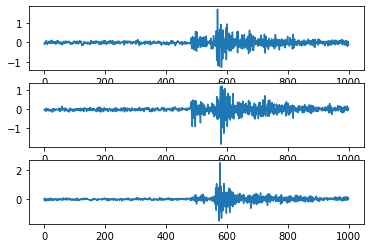

In [15]:
ind = np.random.randint(19337)
print(sig_df['cutlength'][ind],":",sig_df['signal'][ind])
plot_sig(sig_df, ind)

In [16]:
p_arrive = sig_df['p_arrival'][ind]

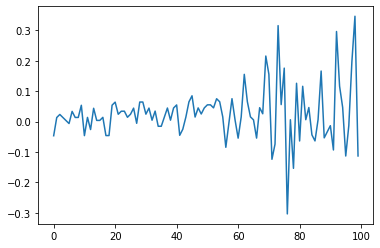

In [17]:
plt.plot(sig_df['trmatrix_cut'][ind][2][p_arrive-50:p_arrive+50])

In [18]:
print("STA:", np.var(sig_df['trmatrix_cut'][ind][2][p_arrive-25:p_arrive+25]))
print("LTA:", np.var(sig_df['trmatrix_cut'][ind][2][p_arrive-50:p_arrive+50]))

STA: 0.00491256169471
LTA: 0.00784061172773


In [19]:
print("STA:", np.mean(sig_df['trmatrix_cut'][ind][2][p_arrive-25:p_arrive+25]))
print("LTA:", np.mean(sig_df['trmatrix_cut'][ind][2][p_arrive-50:p_arrive+50]))

STA: 0.0344
LTA: 0.0256


In [20]:
diff_arr_st = np.diff(sig_df['trmatrix_cut'][ind][2][p_arrive-25:p_arrive+25])
diff_arr_lt = np.diff(sig_df['trmatrix_cut'][ind][2][p_arrive-50:p_arrive+50])

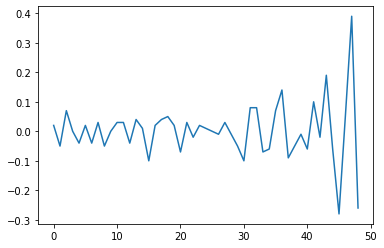

In [21]:
plt.plot(diff_arr_st)

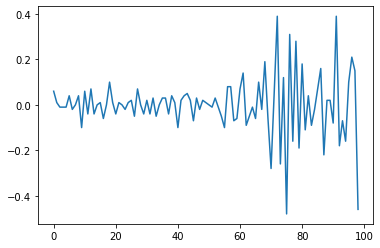

In [22]:
plt.plot(diff_arr_lt)